### Imports

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
from utils import *
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (16, 8)
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from joblib import Parallel, delayed
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

### Data

In [2]:
data_v1 = pd.read_csv('data/data_v1.csv')
data_v1.time = pd.to_datetime(data_v1.time, infer_datetime_format=True)
data_v1 = data_v1.set_index('time', drop=True)  
data_v1 = data_v1.sort_index()

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_v1.csv'

In [3]:
data_v1.isnull().sum()
data_v1.loc[data_v1.isnull().price]

NameError: name 'data_v1' is not defined

In [138]:
data_v1_train = data_v1[:-168]
data_v1_test = data_v1[-168:]
data_v1_train.isnull().sum()
data_v1_test.isnull().sum()

price    168
exog       0
dtype: int64

<AxesSubplot:xlabel='weekday'>

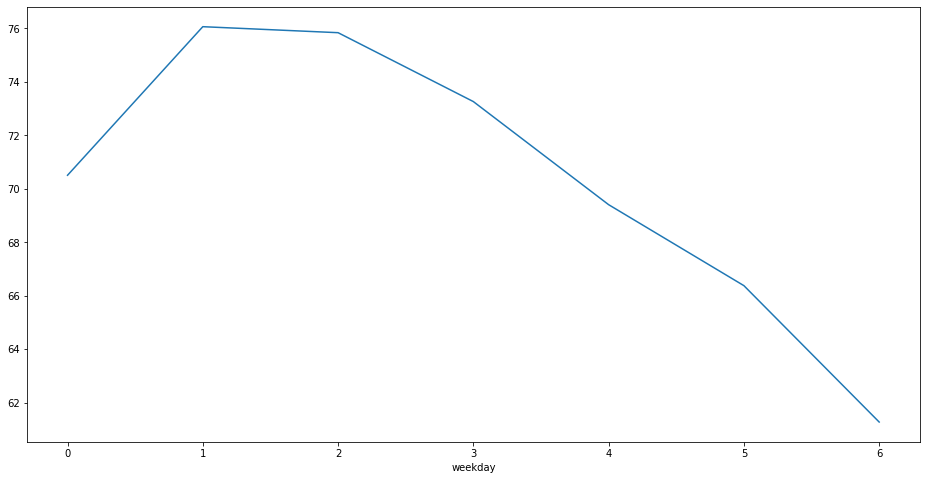

In [139]:
data_v1_plots = pd.read_csv('data/data_v1.csv')
data_v1_plots.time = pd.to_datetime(data_v1_plots.time, infer_datetime_format=True)
data_v1_plots['weekday'] = data_v1_plots.time.dt.weekday
data_v1_plots.groupby('weekday').mean().price.plot()

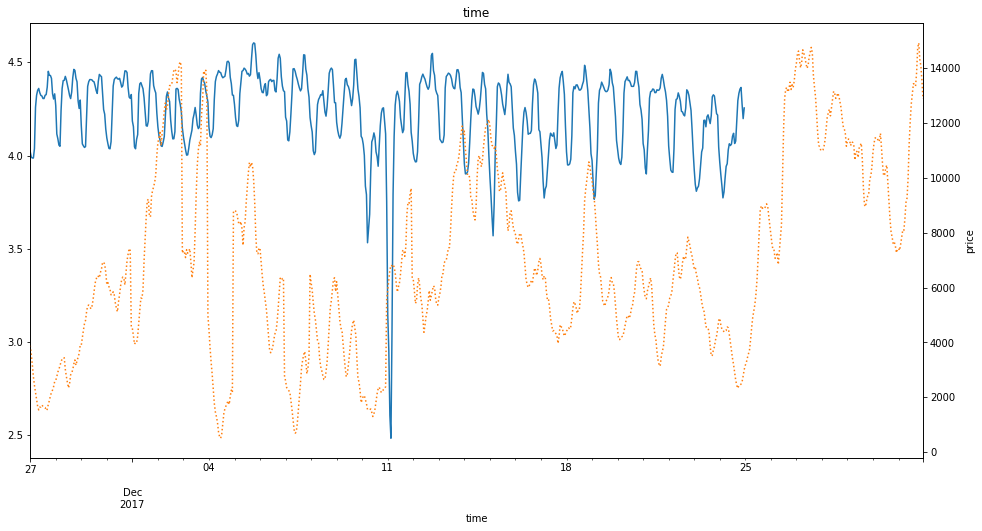

In [140]:
np.log(data_v1.price).plot();
data_v1.exog.plot(ls=':', secondary_y=True);
plt.ylabel('price')
plt.title('time')
plt.show()

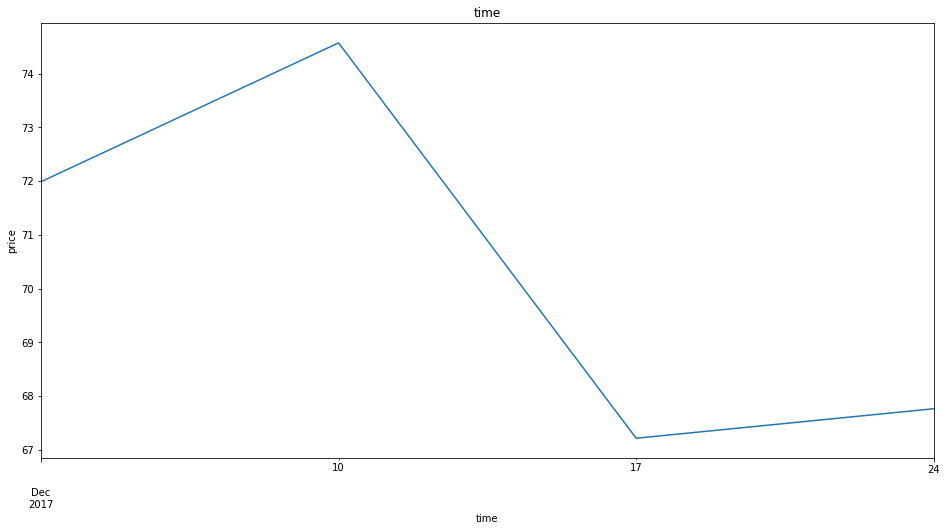

In [141]:
data_v1_train.resample('W').price.mean().plot();
plt.ylabel('price')
plt.title('time')
plt.show()

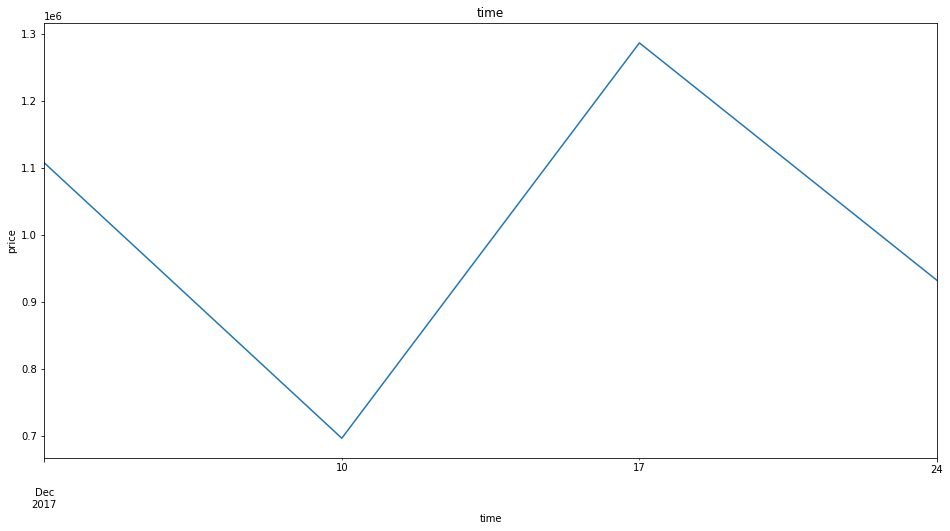

In [142]:
data_v1_train.resample('W').exog.sum().plot();
plt.ylabel('price')
plt.title('time')
plt.show()

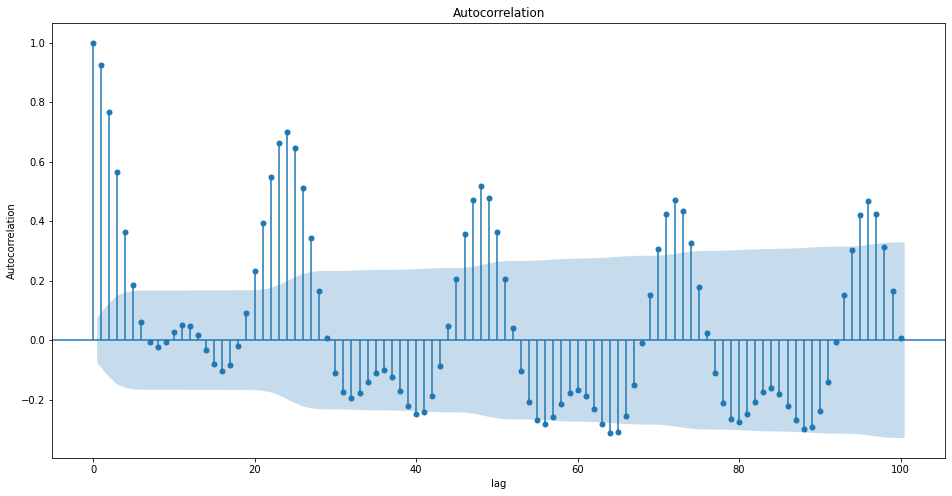

In [143]:
plot_acf(data_v1_train.price, alpha=.05, lags = 100)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

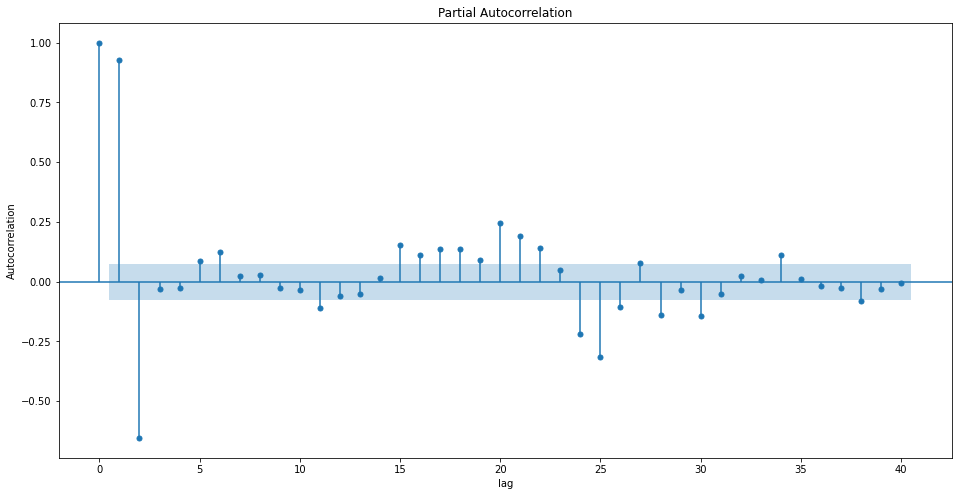

In [144]:
plot_pacf(data_v1_train.price, alpha=.05, lags = 40)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

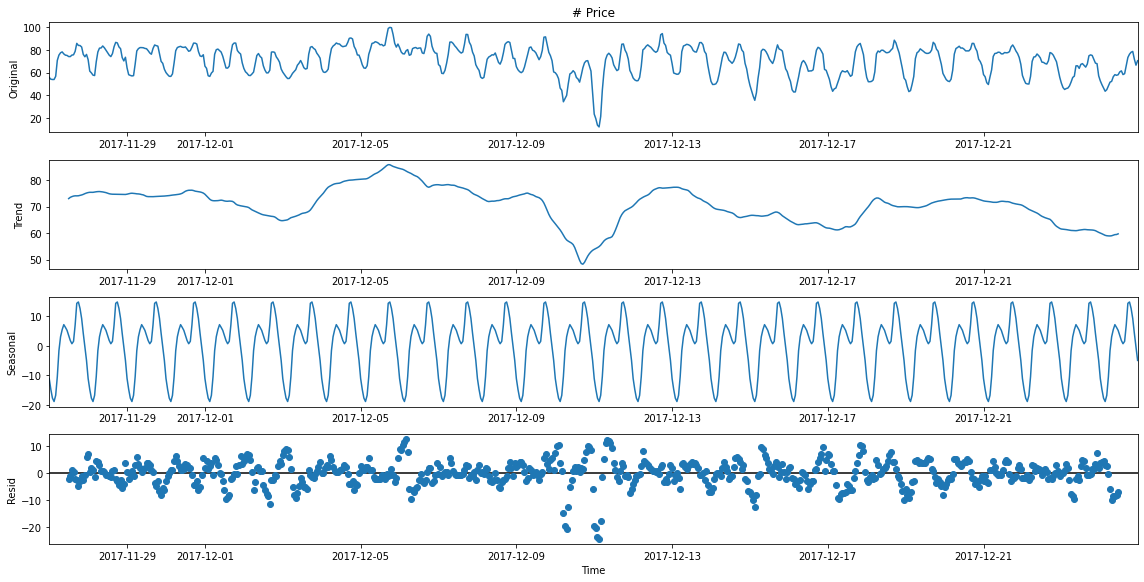

In [145]:
decomposition = seasonal_decompose(data_v1_train.price.asfreq('H', method='ffill'), model='additive')
fig = decomposition.plot()
fig.axes[0].set_title('# Price')
fig.axes[0].set_ylabel('Original')
fig.axes[3].set_xlabel('Time')
plt.show()

## Data V1 

In [146]:
data_v1_train = data_v1[:-336]
data_v1_val = data_v1[-336:-168]
data_v1_test = data_v1[-168:]

In [167]:
predictions = predict_n_periods(series_=data_v1_train, 
                  n_periods=len(data_v1_val), 
                  model=LinearRegression(), 
                  num_periods_lagged=48,
                  weekday = True,
                  num_periods_diffed=2,
                  target="price"
                  )

  0%|          | 0/168 [00:00<?, ?it/s]

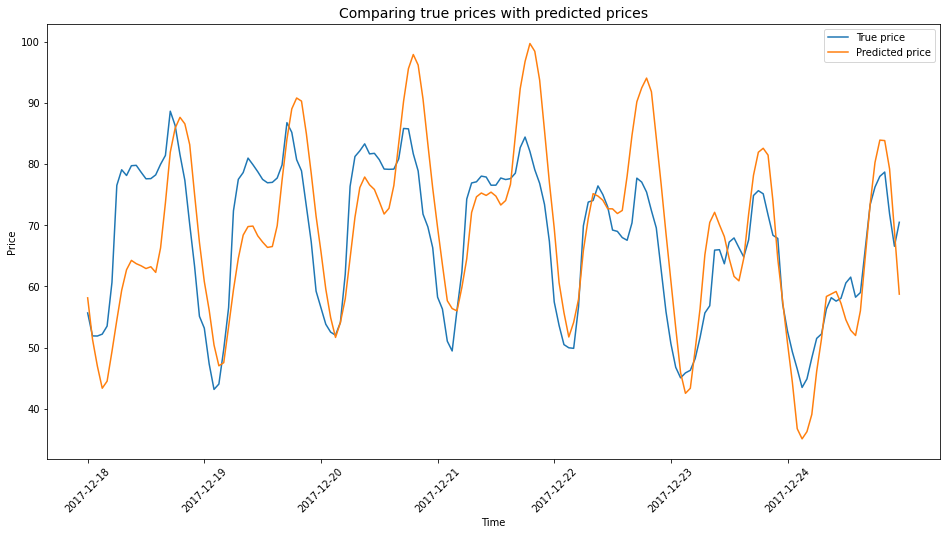

In [168]:
plt.plot(pd.DataFrame(data_v1_val['price']), label='True price')
plt.plot(data_v1_val.index, predictions, label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Comparing true prices with predicted prices', size=14)
plt.legend()
plt.xticks(rotation=45);
plt.xticks(data_v1_val.index[::24].values)
plt.show()

In [169]:
mean_absolute_error(data_v1_val.price,predictions)

7.436555134449479

## Data V2 - First Submission

In [155]:
data_v2 = pd.read_csv('data/data_v2.csv')
data_v2.time = pd.to_datetime(data_v2.time, infer_datetime_format=True)
data_v2 = data_v2.set_index('time', drop=True)  
data_v2 = data_v2.sort_index()

In [156]:
data_v2.isnull().sum()
data_v2.loc[data_v2.isnull().price]

,price,exog
time,,
2017-12-25 00:00:00,NaN,3167.0
2017-12-25 01:00:00,NaN,3271.0
2017-12-25 02:00:00,NaN,3443.0
2017-12-25 03:00:00,NaN,3591.0
2017-12-25 04:00:00,NaN,3736.0
...,...,...
2017-12-31 19:00:00,NaN,14922.0
2017-12-31 20:00:00,NaN,14321.0
2017-12-31 21:00:00,NaN,14087.0


In [186]:
data_v2_train = data_v2[:-336]
data_v2_val = data_v2[-336:-168]
data_v2_test = data_v2[-168:]
data_v2_train_val = data_v2[:-168]

(26136, 2)

In [181]:
predictions = predict_n_periods(series_=data_v2_train_val, 
                  n_periods=len(data_v2_test), 
                  model=LinearRegression(), 
                  num_periods_lagged=48,
                  weekday = True,
                  num_periods_diffed=2,
                  target="price"
                               )

  0%|          | 0/168 [00:00<?, ?it/s]

In [183]:
baseline_submission = pd.DataFrame(predictions, columns=['price'])
baseline_submission.head()
baseline_submission.to_csv('baseline_submission.csv', index=False)
baseline_submission.head()

,price
0,66.519787
1,62.394416
2,58.887718
3,56.865891
4,56.996083


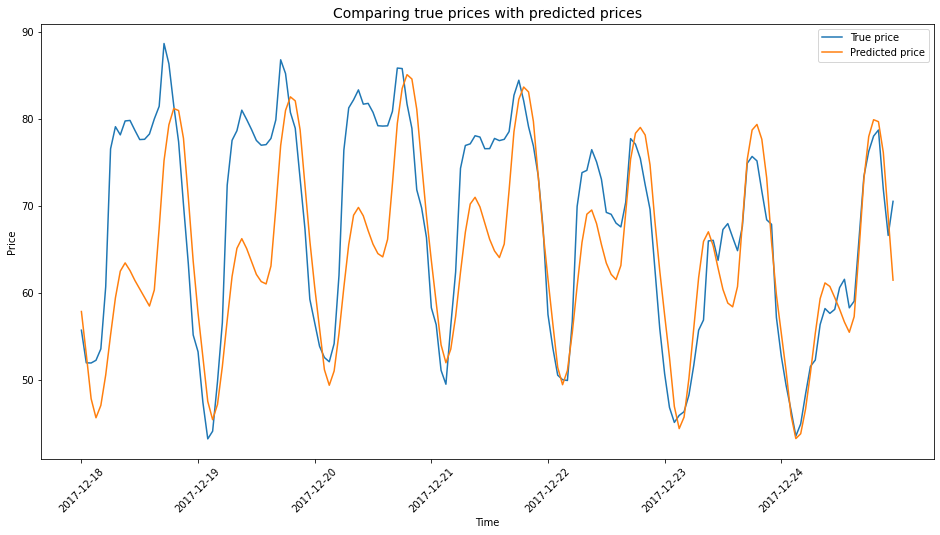

In [165]:
plt.plot(pd.DataFrame(data_v2_val['price']), label='True price')
plt.plot(data_v2_val.index, predictions, label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Comparing true prices with predicted prices', size=14)
plt.legend()
plt.xticks(rotation=45);
plt.xticks(data_v2_val.index[::24].values)
plt.show()

In [166]:
mean_absolute_error(data_v2_val.price,predictions)

6.570881646115998

## Data V2 - Second Submission

<AxesSubplot:xlabel='month'>

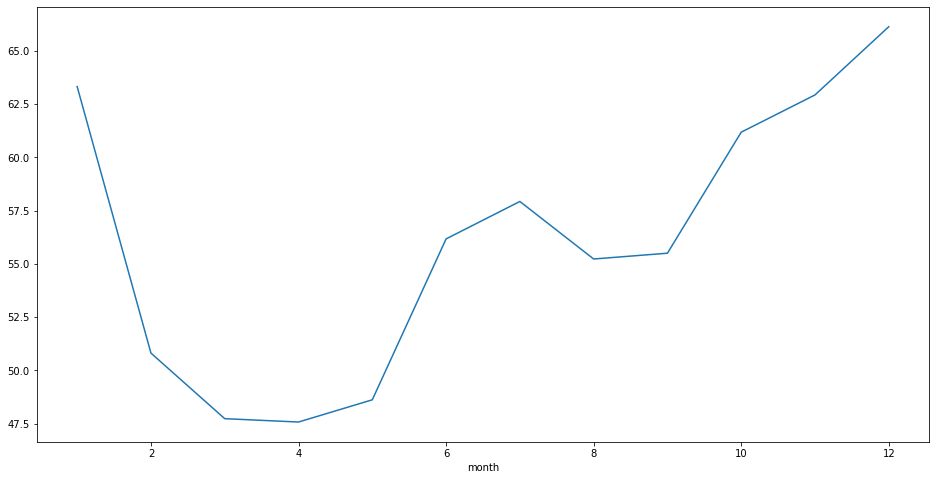

In [179]:
data_v2_plots = pd.read_csv('data/data_v2.csv')
data_v2_plots.time = pd.to_datetime(data_v2_plots.time, infer_datetime_format=True)
data_v2_plots['month'] = data_v2_plots.time.dt.month
data_v2_plots.groupby('month').mean().price.plot()

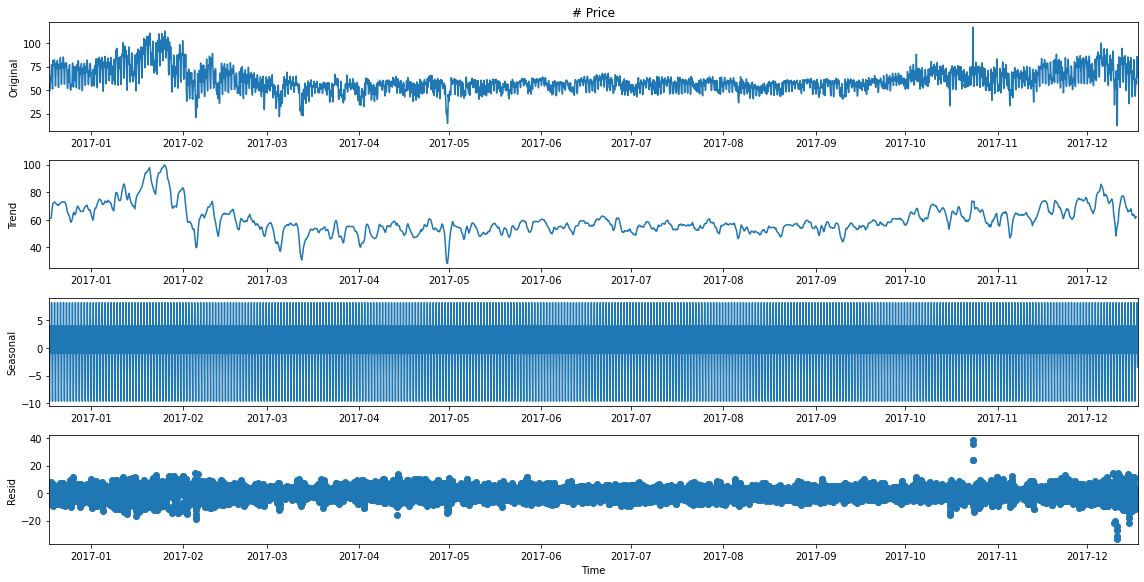

In [174]:
decomposition = seasonal_decompose(data_v2_train[-8760:].price.asfreq('H', method='ffill'), model='additive')
fig = decomposition.plot()
fig.axes[0].set_title('# Price')
fig.axes[0].set_ylabel('Original')
fig.axes[3].set_xlabel('Time')
plt.show()